# Project 1, Part 1
Name: Thomas Greenacre
Date: 6/5/2022

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import pandas library
import pandas as pd

# read in file and show summary (first 5 rows) to validate the file was read in
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Week 2/sales_predictions (1).csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# use the .shape function to get the number of rows and columns
df.shape

(8523, 12)

In [ ]:
# use the .info function to understand the data type (Dtype) of each field 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# identify any duplicate rows with a True or False
df.duplicated().sum()

0

In [ ]:
# identify the number of cells missing data for each field
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# inspect the Item_Weight field to gain understandng around missing data
df[['Item_Weight']].describe()

,Item_Weight
count,7060.000000
mean,12.857645
std,4.643456
min,4.555000
25%,8.773750
50%,12.600000
75%,16.850000
max,21.350000


In [ ]:
# inspect the Outlet_Size field to gain understandng around missing data
df[['Outlet_Size']].describe()

,Outlet_Size
count,6113
unique,3
top,Medium
freq,2793


In [ ]:
# after inspecting and finding both fields (Item_Weight and Outlet_Size) have a large % of missing values (~17%,  ~28%), I decided to drop both fields. 
# Had the % of missing cells been much lower (<5%), I would have used a different method such as taking the mean, median, or mode to fill missing cells for Itme_Weight feid
df = df.drop(columns=['Item_Weight', 'Outlet_Size'])
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [ ]:
# validating that there is no missing values for any remaining fields
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
# use the nunique function to see how many unique values their are for each field; this is helpful esecially when inspecting categprical data
df.nunique()

Item_Identifier              1559
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
# begin inspecing specific fields (Item_Type) to see if there is "dirty" data that needs to be cleaned up
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
# inspect the cleanliness of the 'Outlet_Identifier' field 
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
# inspect the cleanliness of the 'Item_Fat_Content' field 
# as you can see there is some "dirty" data that needs to be cleaned up
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# cleanup the 'Item_Fat_Content' field by replacing incorrect values with correct values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')

# use the value_counts function again to validate 
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# inspect another categorical field 'Outlet_Location_Type' for data cleanliness; no issues
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
# inspect another categorical field 'Outlet_Location_Type' for data cleanliness; no issues
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
df[['Item_Identifier', 'Item_Visibility']].describe()

,Item_Visibility
count,8523.000000
mean,0.066132
std,0.051598
min,0.000000
25%,0.026989
50%,0.053931
75%,0.094585
max,0.328391


In [ ]:
# use the describe function to show stats for each numerical (float or int) field
df[["Item_Visibility", "Item_MRP", "Outlet_Establishment_Year", "Item_Outlet_Sales"]].describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


# Project 1, Part 3: Histograms, Boxplots, Correlation & HeatMaps
Name: Thomas Greenacre
Date: 6/5/2022

---

In [ ]:
# readin orignal data set
df_2 = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Week 2/sales_predictions (1).csv')
df_2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# use .corr() function to performance correlation analysis between multiple variables (fields)
corr = df_2.corr()

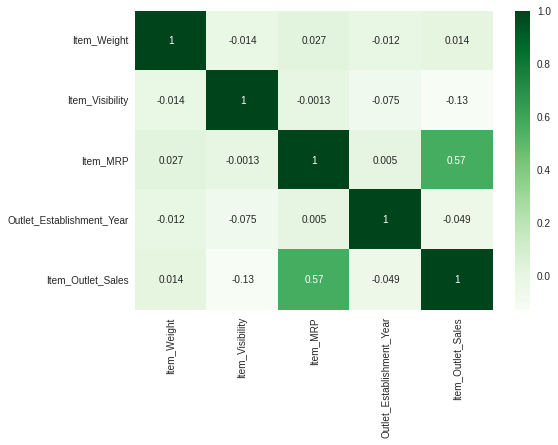

In [ ]:
# use seaborn library to visualize the correlation analaysis 
import seaborn as sns
sns.heatmap(corr, cmap = 'Greens', annot = True);
# Top Positive Correlation(s): Item_MRP & Item_Outlet_Sales (0.57)
# Top Negative Correlation(s): Item_Outlet_Sales & Outlet_Establishment_Year (-0.049)
# Key Takeawat: the only variables that seem to have a strong relationship between each other is Item_MRP & Item_Outlet_Sales. All other relationships are close to 0.0, indicating low correlation between the 2 varibales

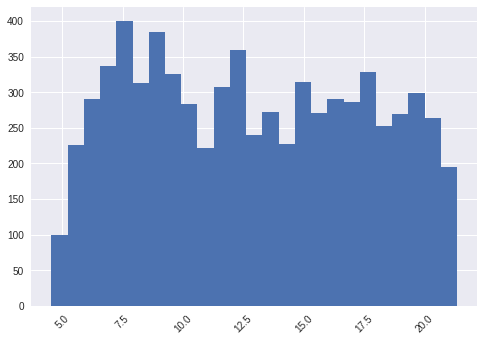

In [ ]:
# create hsitogram to undstand distribution of 'Item_Weight' field
df_2['Item_Weight'].hist(bins = 25)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
# takeaway: little variance in distribution of 'Item_Weight'; the number of items with a smaller item weight is similar to the number of items with a greater item wieght

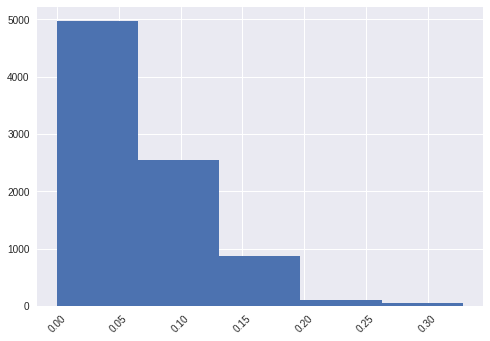

In [ ]:
# create hsitogram to undstand distribution of 'Item_Visibility' field
df_2['Item_Visibility'].hist(bins = 5)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
# takeaway: most items have an item visibility between 0.00 and 0.125; after 0.125 there are only a few items with greater visibility and 0 items with less than 0.00 visibiliy

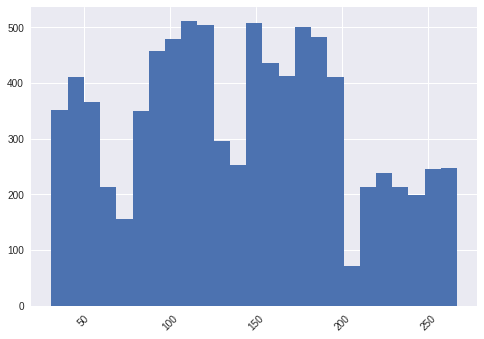

In [ ]:
# create hsitogram to undstand distribution of 'Item_MRP' field
df_2['Item_MRP'].hist(bins = 25)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
# takeway: most items are have an MRP of vetween 75 and 200. There are a few items with less than 75 MRP and few items with greater than 200 MR P

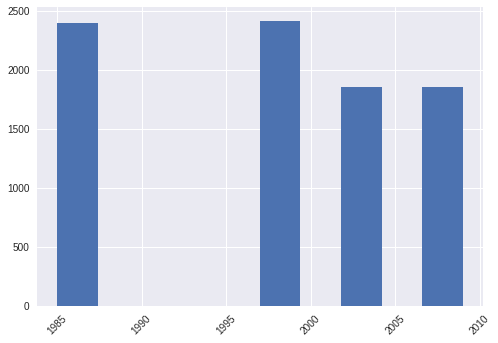

In [ ]:
# create hsitogram to undstand distribution of 'Outlet_Establishment_Year' field
df_2['Outlet_Establishment_Year'].hist(bins = 10)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
# takeaway: most items have an estavlihs year between ~1997 and ~2009; there is an outlier where a number of items have an estalblishment year between ~1985 and ~1987

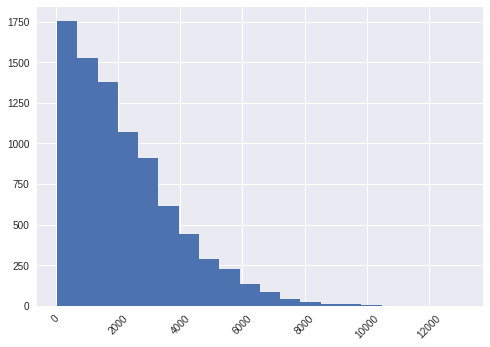

In [ ]:
# create hsitogram to undstand distribution of 'Item_Outlet_Sales' field
df_2['Item_Outlet_Sales'].hist(bins = 20)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
#takeaway: most items have few outlet sales, as expected there are few items bring in more outlet sales then others

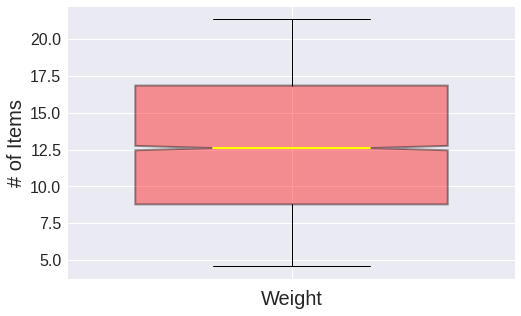

In [ ]:
# create a boxplot to better understand the distribution for the 'Item_weight' field
Weight = df_2.loc[df_2['Item_Weight'] >= 0,'Item_Weight']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([Weight],
           notch = True,
           labels=[''],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Weight', fontsize = 20);
plt.ylabel('# of Items', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
#takeaway: the mean weight is 12.5 and the majority of items have a weight between ~8 and ~17. 

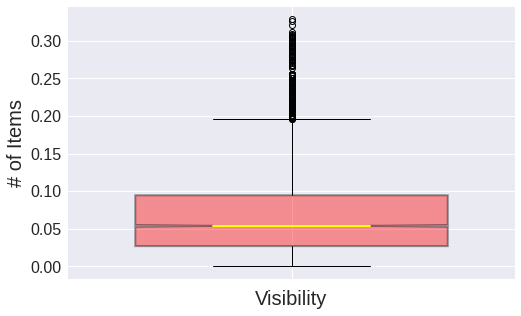

In [ ]:
# create a boxplot to better understand the distribution for the 'Item_Visibility' field
Visibility = df_2.loc[df_2['Item_Visibility'] >= 0,'Item_Visibility']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([Visibility],
           notch = True,
           labels=[''],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('Visibility', fontsize = 20);
plt.ylabel('# of Items', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
#takeaway: the mean visibility is 0.05 with the majority of items having a visibility range from ~0.025 to ~0.10. There are some outliers, most of which are of higher (greater than 0.10) visibility

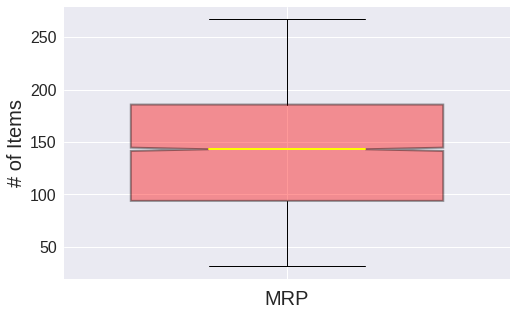

In [ ]:
# create a boxplot to better understand the distribution for the 'Item_MRP' field
MRP = df_2.loc[df_2['Item_MRP'] >= 0,'Item_MRP']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([MRP],
           notch = True,
           labels=[''],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('red')
plt.xlabel('MRP', fontsize = 20);
plt.ylabel('# of Items', fontsize = 20);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);
#takeaway: the average (mean) MRP is ~147 with most items having a MRP between ~97 and ~190. The highest MRP is ~265

# Project 1, Part 4

In [ ]:
outletsize = np.round(df_2.groupby(['Outlet_Size'])[['Item_Outlet_Sales']].sum())
outletsize

,Item_Outlet_Sales
Outlet_Size,
High,2142664.0
Medium,7489719.0
Small,4566212.0


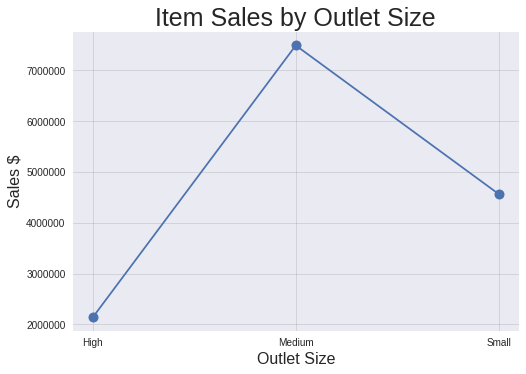

In [ ]:
# create a chart the plots the average MRP by Item Type, include grids, x & y labels, etc.
plt.style.use('seaborn')
plt.plot(outletsize, marker = '.', markersize = 20)
plt.grid(c = 'k', 
         alpha = .1,
         linestyle = '-')
plt.xlabel('Outlet Size', fontsize = 16)
plt.ylabel('Sales $', fontsize = 16)
plt.title('Item Sales by Outlet Size', fontsize = 25)
plt.ticklabel_format(style='plain', axis='y');

In [ ]:
# create a dataset for the average MRP by 'Item_Type'
AvgMRP = df_2.groupby(['Item_Type'])['Item_MRP'].mean()
AvgMRP

Item_Type
Baking Goods             126.380766
Breads                   140.952669
Breakfast                141.788151
Canned                   139.763832
Dairy                    148.499208
Frozen Foods             138.503366
Fruits and Vegetables    144.581235
Hard Drinks              137.077928
Health and Hygiene       130.818921
Household                149.424753
Meat                     139.882032
Others                   132.851430
Seafood                  141.841719
Snack Foods              146.194934
Soft Drinks              131.492506
Starchy Foods            147.838023
Name: Item_MRP, dtype: float64

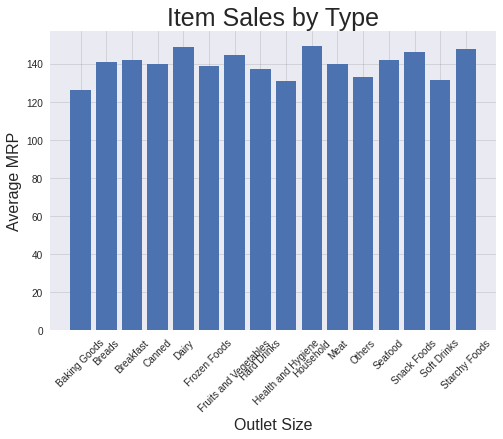

In [ ]:
# create a chart the plots the average MRP by Item Type, include grids, x & y labels, rotate x axis labels, etc.
plt.style.use('seaborn')
plt.bar(AvgMRP.index,AvgMRP.values)
plt.grid(c = 'k', 
         alpha = .1,
         linestyle = '-')
plt.xlabel('Outlet Size', fontsize = 16)
plt.ylabel('Average MRP', fontsize = 16)
plt.title('Item Sales by Type', fontsize = 25)
plt.xticks(rotation=45); #source: https://www.delftstack.com/howto/seaborn/rotate-tick-labels-seaborn/

# Project 1, Part 5: Pre-Processing for ML

In [ ]:
# make copy of original dateframe to prevent data leakage
df_ml = df.copy()
df_ml.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [ ]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [ ]:
# inspect data types to determine numerical, ordinal, or nominal classification
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


In [ ]:
# verify no null values
df_ml.isna().sum().sum()

0

In [ ]:
df_ml.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    5517
Regular    3006
dtype: int64

In [ ]:
df_ml.value_counts('Outlet_Location_Type')

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
dtype: int64

In [ ]:
df_ml.value_counts('Outlet_Type')

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
dtype: int64

Identify each feature as numerical, ordinal, or nominal.


*   Item_Identifier: nominal
*   Item_Fat_Content: nominal 
*   Item_Visibility: nominal
*   Item_Type: nominal
*   Item_MRP: numerical
*   Outlet_Identifier: ordinal
*   Outlet_Establishment_Year: numerical
*   Outlet_Location_Type: ordinal
*   Outlet_Type: ordinal
*   Item_Outlet_Sales: numerical

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


In [ ]:
# Define features (X) and target (y), train test split
X = df_ml.drop('Item_Outlet_Sales', axis=1)
y = df_ml['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f75fa19b410>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f75fa19b390>)])

In [ ]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f75fa19b410>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f75fa19b390>)])

In [ ]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1588)




array([[-0.71277507,  1.82810922,  1.32784893, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29105225,  0.60336888,  1.32784893, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.81331864,  0.24454056,  0.13618724, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.92052713,  1.52302674,  0.49368575, ...,  1.        ,
         0.        ,  0.        ],
       [-0.2277552 , -0.38377708,  1.0895166 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.95867683, -0.73836105, -0.10214509, ...,  1.        ,
         0.        ,  0.        ]])

# Project 1, Final

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
set_config(display='diagram')

In [ ]:
# use df_ml from part 5 which is already has the Ordinal encoding
# inspect remaining field data types to see what will be OHE & Nominal encoded
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


In [ ]:
# inspect field for value cleanliness
df_ml['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# assign target variables ( X & y ) for the model
target = 'Item_Outlet_Sales'
X = df_ml.drop(columns=target).copy()
y = df_ml[target].copy()
X

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2


In [ ]:
# drop unneccesary features from X that dont influence the target 
bad_cols = ['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year']
X = X.drop(columns=bad_cols)
X # view X to ensure columns were dropped

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type
0,Low Fat,0.016047,Dairy,249.8092,Tier 1,Supermarket Type1
1,Regular,0.019278,Soft Drinks,48.2692,Tier 3,Supermarket Type2
2,Low Fat,0.016760,Meat,141.6180,Tier 1,Supermarket Type1
3,Regular,0.000000,Fruits and Vegetables,182.0950,Tier 3,Grocery Store
4,Low Fat,0.000000,Household,53.8614,Tier 3,Supermarket Type1
...,...,...,...,...,...,...
8518,Low Fat,0.056783,Snack Foods,214.5218,Tier 3,Supermarket Type1
8519,Regular,0.046982,Baking Goods,108.1570,Tier 2,Supermarket Type1
8520,Low Fat,0.035186,Health and Hygiene,85.1224,Tier 2,Supermarket Type1
8521,Regular,0.145221,Snack Foods,103.1332,Tier 3,Supermarket Type2


1) Build a linear regression model to predict sales.

In [ ]:
#setup train / test / split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# verify the preprocessor output is all numeric values
preprocessor.fit_transform(X_train)

array([[-0.71277507,  1.82810922,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.29105225,  0.60336888,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.81331864,  0.24454056,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.92052713,  1.52302674,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.2277552 , -0.38377708,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.95867683, -0.73836105,  1.        , ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
#instantiate a linear regression model
reg = LinearRegression()

In [ ]:
#create pipeline with your preprocessor first and linear regression model last
reg_pipe = make_pipeline(preprocessor, reg)

In [ ]:
#fit the modeling pipeline on the training data
reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f75fa19b410>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f75fa19b390>)])),
                ('linearregression', LinearRegression())])

In [ ]:
# check the score of the model on the testing data
reg_pipe.score(X_test, y_test)

0.5658471318700875

Evaluate the performance of your model based on r^2.

In [ ]:
#create preditions for both test and train
test_predictions = reg_pipe.predict(X_test)
train_predictions = reg_pipe.predict(X_train)

In [ ]:
#create R2 metrics for from train and test and evaluate result
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)
print(r2_train)
print(r2_test)

#takeaway: model accounts for ~56% of y_train variation using x_test features...
# the model didnt score really high (closer to 1) or very low (0)

0.5605433358643774
0.5658471318700875


Evaluate the performance of your model based on rmse

In [ ]:
# calculating RMSE using mumpy

train_RMSE = np.sqrt(np.mean(np.abs(train_predictions - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_predictions - y_test)**2))

print(train_RMSE)
print(test_RMSE)

1140.4177004801268
1094.4486751815027


2) Build a regression tree model to predict sales.

In [ ]:
#view data set to ensure quality
df_ml.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [ ]:
#identify target field (feature)
y = df_ml['Item_Outlet_Sales']
X = df_ml.drop(columns = 'Item_Outlet_Sales')

In [ ]:
# drop unneccesary features from X that dont influence the target 
bad_cols = ['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year']
X = X.drop(columns=bad_cols)
X # view X to ensure columns were dropped

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type
0,Low Fat,0.016047,Dairy,249.8092,Tier 1,Supermarket Type1
1,Regular,0.019278,Soft Drinks,48.2692,Tier 3,Supermarket Type2
2,Low Fat,0.016760,Meat,141.6180,Tier 1,Supermarket Type1
3,Regular,0.000000,Fruits and Vegetables,182.0950,Tier 3,Grocery Store
4,Low Fat,0.000000,Household,53.8614,Tier 3,Supermarket Type1
...,...,...,...,...,...,...
8518,Low Fat,0.056783,Snack Foods,214.5218,Tier 3,Supermarket Type1
8519,Regular,0.046982,Baking Goods,108.1570,Tier 2,Supermarket Type1
8520,Low Fat,0.035186,Health and Hygiene,85.1224,Tier 2,Supermarket Type1
8521,Regular,0.145221,Snack Foods,103.1332,Tier 3,Supermarket Type2


In [ ]:
#setup train / test / split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
# verify the preprocessor output is all numeric values
preprocessor.fit_transform(X_train)

array([[-0.71277507,  1.82810922,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-1.29105225,  0.60336888,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.81331864,  0.24454056,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.92052713,  1.52302674,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.2277552 , -0.38377708,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.95867683, -0.73836105,  1.        , ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
# import DescitionTreeRegressor from sklearn library
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# assign DecisionTreeRegressor to a variable
dec_tree = DecisionTreeRegressor(random_state = 42)

In [ ]:
# Create pipeline with preprocessor first and DecisionTreeRegression model last
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

In [ ]:
# Fit the modeling pipeline on the training data
dec_tree_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f75fa19b410>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f75fa19b390>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
# create preditions for both test and train
test_predictions = dec_tree_pipe.predict(X_test)
train_predictions = dec_tree_pipe.predict(X_train)

In [ ]:
# create R2 metrics for from train and test and evaluate result
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)
print(r2_train)
print(r2_test)

# takeaway: the model needs to be tuned (optimized)

1.0
0.17568425820003153


In [ ]:
# Looking at options for tuning this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
# What was the depth of our default tree?
dec_tree.get_depth()

40

In [ ]:
# How many leaf nodes?
dec_tree.get_n_leaves()

6264

In [ ]:
# List of values to try for max_depth:
depths = list(range(2, 40)) # will try every value between 2 and 36
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test','Train'])

#print(X_train)
#loop over the values in depths
for n in depths:
  #Trying depth. Printing depth = n
  #fit a new model with max_depth=n
  tree = DecisionTreeRegressor(max_depth=n, random_state=42)

  #put the model into a pipeline
  tree_pipe = make_pipeline(preprocessor, tree)
  
  #fit the model
  tree_pipe.fit(X_train, y_train)
  
  #create prediction arrays
  train_pred = tree_pipe.predict(X_train)
  test_pred = tree_pipe.predict(X_test)
  
  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)
  
  #store the scores in the scores dataframe
  scores.loc[n, 'Train'] = train_r2score
  scores.loc[n, 'Test'] = test_r2score
scores.head()

,Test,Train
2,0.433778,0.431641
3,0.524222,0.524218
4,0.584005,0.582625
5,0.594747,0.603925
6,0.583905,0.614877


In [ ]:
# sort scores with the best results desc 
sorted_scores = scores.sort_values(by='Test', ascending=False)
sorted_scores.head()

,Test,Train
5,0.594747,0.603925
4,0.584005,0.582625
6,0.583905,0.614877
7,0.580576,0.625963
8,0.566699,0.641355


In [ ]:
# calculating R2 using numpy

train_r2 = np.corrcoef(y_train, train_pred)[0][1]**2
test_r2 = np.corrcoef(y_test, test_pred)[0][1]**2

print(train_r2)
print(test_r2)

0.9999968231540164
0.3621479904070944


In [ ]:
# checking with best depth
# List of values to try for max_depth:
depths = list(range(2, 40)) # will try every value between 2 and 36
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(columns=['Test','Train'])

#print(X_train)
#loop over the values in depths

  #Trying depth. Printing depth = n
  #fit a new model with max_depth=n
tree = DecisionTreeRegressor(max_depth=5, random_state=42)

  #put the model into a pipeline
tree_pipe = make_pipeline(preprocessor, tree)
  
  #fit the model
tree_pipe.fit(X_train, y_train)
  
  #create prediction arrays
train_pred = tree_pipe.predict(X_train)
test_pred = tree_pipe.predict(X_test)
  
  #evaluate the model using R2 Score
train_r2score = r2_score(y_train, train_pred)
test_r2score = r2_score(y_test, test_pred)
  
  #store the scores in the scores dataframe
scores.loc[5, 'Train'] = train_r2score
scores.loc[5, 'Test'] = test_r2score
scores.head()

,Test,Train
5,0.594747,0.603925


In [ ]:
# calculating RMSE using mumpy
train_RMSE = np.sqrt(np.mean(np.abs(train_predictions - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_predictions - y_test)**2))

print(train_RMSE)
print(test_RMSE)

0.0
1508.0677735458733


3) You now have tried 2 different models on your data set. You need to determine which model to implement.

Based on the R2 scores used to evaluate both models (see below); the Decision Tree Model should be impletemented

Linear Regression R2 Scores
*   Train: 0.560543
*   Test: 0.565847

Decisions Tree R2 Scores
*   Train: 0.603925
*   Test: 0.594747


4) complete a README in your GitHub repository

***see GitHub***